# MNIST - Categorical Classification
> # Overfitting Issue
## Import TensorFlow

In [2]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow

In [4]:
import tensorflow as tf

tf.__version__

'2.17.0'

* GPU 설정 확인

In [6]:
tf.test.gpu_device_name()

''

* GPU 종류 확인

In [8]:
!nvidia-smi

Fri Oct 25 11:26:46 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.28       Driver Version: 512.28       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   59C    P8     4W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# I. MNIST Data_Set Load & Review

> ## 1) Load MNIST Data_Set

In [11]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

* Train_Data Information

In [13]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)

60000
[5 0 4 1 9]


* Test_Data Information

In [15]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)

10000
[7 2 1 0 4]


> ## 2) Visualization

* matplotlib

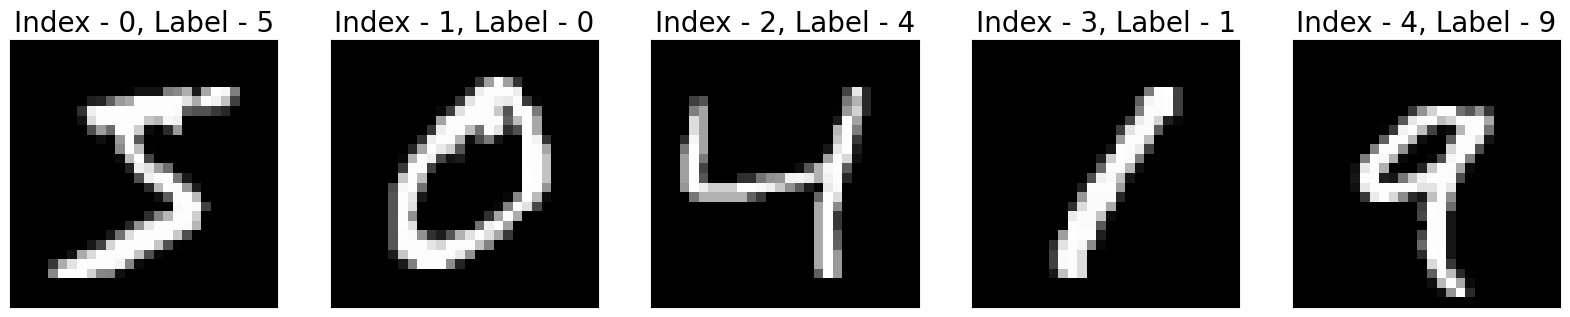

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 4))
for idx in range(5):
    label = y_train[idx]
    plt.subplot(1, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx], cmap = 'gray')
    plt.title('Index - %d, Label - %d' % (idx, label), fontsize = 20)
plt.show()

* NumPy Array

In [20]:
import numpy as np
np.set_printoptions(linewidth = 150, precision = 2)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# II. Data Preprocessing

> ## 1) Normalization

* 범위: 0 ~ 1

In [24]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [25]:
print(X_train[4])

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

> ## 2) Reshape

 * (60000, 28, 28) to (60000, 784)

In [27]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

> ## 3) One Hot Encoding

In [29]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [30]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


> ## 4) train_test_split( )

* Train(48,000) vs. Validation(12,000)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((48000, 784), (48000, 10), (12000, 784), (12000, 10))

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes
 - 복잡한 Model Capacity로 인한 Overfitting

In [36]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [38]:
mnist.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

> ## 2) Model Compile

* 모델 학습방법 설정

In [41]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 4분

In [44]:
# %%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8671 - loss: 0.4589 - val_accuracy: 0.9582 - val_loss: 0.1441
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9707 - loss: 0.0978 - val_accuracy: 0.9693 - val_loss: 0.1035
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9836 - loss: 0.0532 - val_accuracy: 0.9743 - val_loss: 0.0906
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9877 - loss: 0.0379 - val_accuracy: 0.9702 - val_loss: 0.0970
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9913 - loss: 0.0287 - val_accuracy: 0.9762 - val_loss: 0.0860
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9941 - loss: 0.0206 - val_accuracy: 0.9760 - val_loss: 0.0985
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9956 - loss: 0.0150 - val_accuracy: 0.9747 - val_loss: 0.1017
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9950 - loss: 0.0155 - val_accu

> ## 4) 학습 결과 시각화 - Overfitting

* Loss Visualization

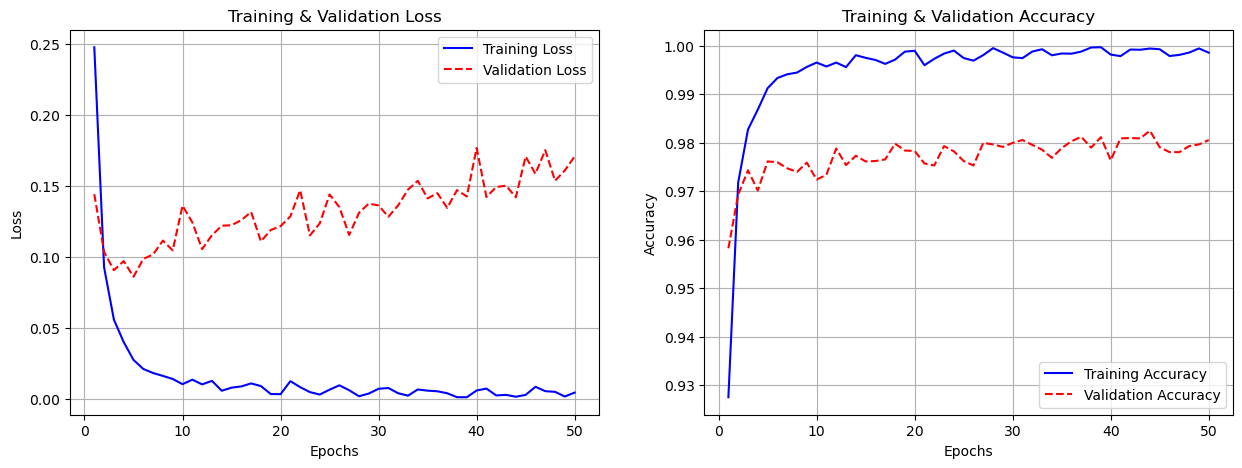

In [47]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [50]:
loss, accuracy = mnist.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.14250
Accuracy = 0.98140


> ## 6) Model Predict

* Probability

In [53]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1,:], verbose = 0))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


* Class

In [55]:
print(np.argmax(mnist.predict(X_test[:1,:], verbose = 0)))

7


> ## 7) Image Visualization

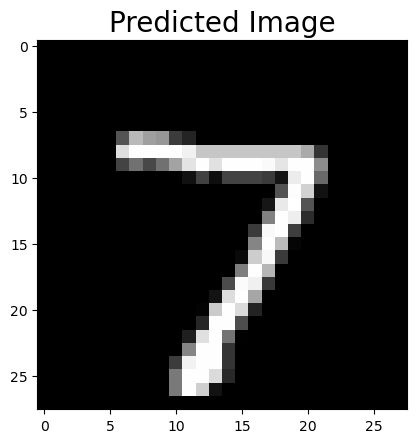

In [57]:
plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray')
plt.title('Predicted Image', fontsize = 20)
plt.show()

> ## 8) Confusion Matrix

In [59]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [60]:
np.argmax(y_test, axis = 1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [61]:
mnist.predict(X_test, verbose = 0)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

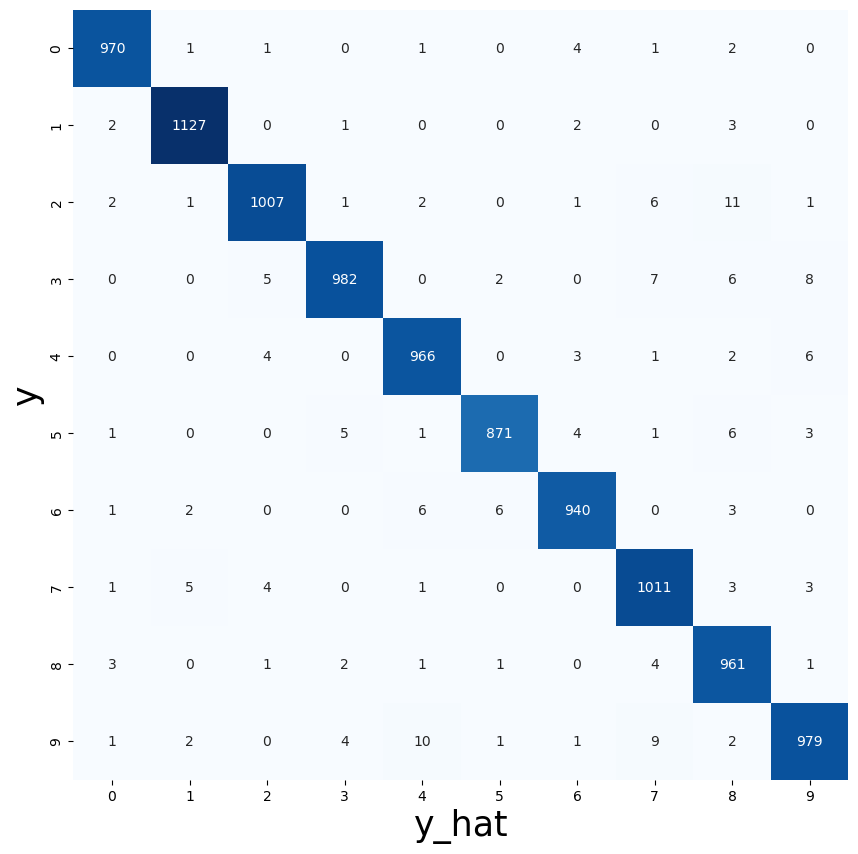

In [63]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

CM = confusion_matrix(np.argmax(y_test, axis = 1), # y true
                      np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)) # y pred

plt.figure(figsize = (10, 10))
sns.heatmap(CM,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            cbar = False)
plt.xlabel('y_hat', fontsize = 25)
plt.ylabel('y', fontsize = 25)
plt.show()

> ## 9) Classification Report

In [65]:
from sklearn.metrics import classification_report

print('\n',
      classification_report(np.argmax(y_test, axis = 1),
                            np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)))


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.96      0.99      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# 1)  model capacity 줄이기

In [67]:
mnist1 = models.Sequential()
mnist1.add(layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
mnist1.add(layers.Dense(10, activation = 'softmax'))

In [68]:
mnist1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
mnist1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [70]:
# %%time

Hist_mnist1 = mnist1.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8469 - loss: 0.5708 - val_accuracy: 0.9415 - val_loss: 0.1997
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9540 - loss: 0.1614 - val_accuracy: 0.9594 - val_loss: 0.1421
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9692 - loss: 0.1086 - val_accuracy: 0.9645 - val_loss: 0.1207
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9779 - loss: 0.0776 - val_accuracy: 0.9699 - val_loss: 0.1015
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9832 - loss: 0.0589 - val_accuracy: 0.9707 - val_loss: 0.0993
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9889 - loss: 0.0425 - val_accuracy: 0.9732 - val_loss: 0.0914
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9904 - loss: 0.0360 - val_accuracy: 0.9736 - val_loss: 0.0912
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9932 - loss: 0.0288 - val_accuracy: 0.

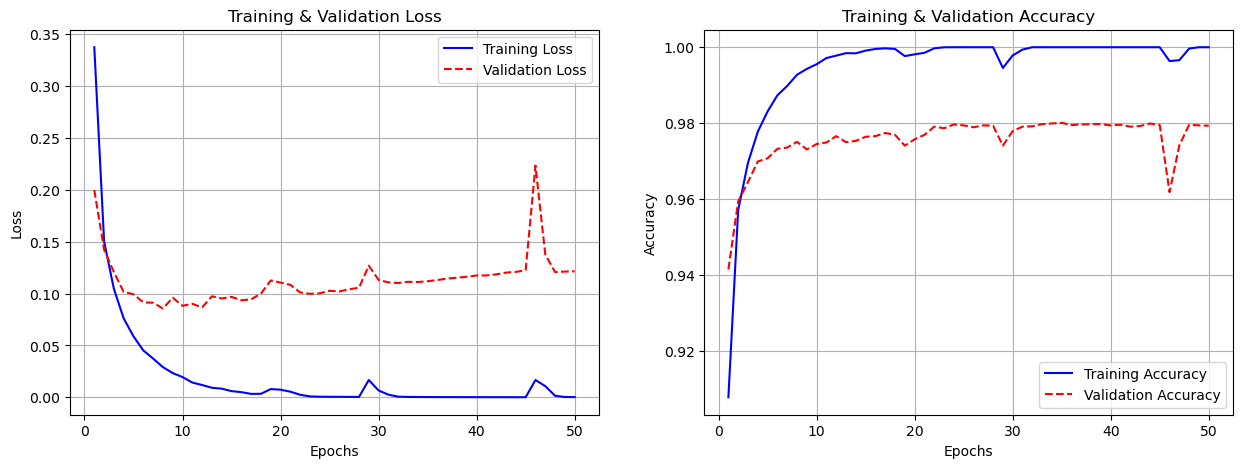

In [71]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist1.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist1.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist1.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist1.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist1.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization
- https://wooono.tistory.com/221
- L1 Regularization 의 개념에서 가장 중요한 것은 cost function 에 가중치의 절대값을 더해준다는 것
- 기존의 cost function 에 가중치의 제곱을 더함으로써 가중치가 너무 크지 않은 방향으로 학습되게 됩니다.
L1 Loss, L2 Loss 의 차이
L2 Loss 는 직관적으로 오차의 제곱을 더하기 때문에 Outlier 에 더 큰 영향을 받습니다.
"L1 Loss 가 L2 Loss 에 비해 Outlier 에 대하여 더 Robust(덜 민감 혹은 둔감) 하다." 라고 표현 할 수 있습니다.
Outlier 가 적당히 무시되길 원한다면 L1 Loss 를 사용하고
Outlier 의 등장에 신경써야 하는 경우라면 L2 Loss 를 사용하는 것이 좋겠습니다.
L1 Loss 는 0인 지점에서 미분이 불가능하다는 단점 또한 가지고 있습니다.

L1 Regularization, L2 Regularization 의 차이와 선택 기준
L1 Regularization은 가중치 업데이트 시, 가중치의 크기에 상관 없이 상수값을 빼면서 진행됩니다.

때문에 작은 가중치들은 거의 0으로 수렴 되어, 몇개의 중요한 가중치들만 남게 됩니다.

그러므로 몇 개의 의미 있는 값을 끄집어내고 싶은 sparse model 같은 경우에는 L1 Regularization이 효과적입니다.

다만, L1 Regularization은 아래 그림처럼 미분 불가능한 점이 있기 때문에 Gradient-base learning 에는 주의가 필요합니다.


L2 Regularization은 가중치 업데이트 시, 가중치의 크기가 직접적인 영향을 미칩니다.

따라서, L2는 L1 보다 가중치 규제에 좀 더 효과적입니다.

In [73]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R = models.Sequential()
mnist_L2R.add(layers.Dense(512, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001), # l2 기본값 0.01
                       input_shape = (28 * 28,)))
mnist_L2R.add(layers.Dense(256, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R.add(layers.Dense(10, activation = 'softmax'))

In [74]:
mnist_L2R.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
mnist_L2R.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [76]:
# %%time

mnist_L2R_H = mnist_L2R.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8648 - loss: 0.4707 - val_accuracy: 0.9628 - val_loss: 0.1386
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9704 - loss: 0.1064 - val_accuracy: 0.9672 - val_loss: 0.1182
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9823 - loss: 0.0667 - val_accuracy: 0.9748 - val_loss: 0.0962
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9891 - loss: 0.0467 - val_accuracy: 0.9753 - val_loss: 0.0982
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9917 - loss: 0.0380 - val_accuracy: 0.9734 - val_loss: 0.1068
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9930 - loss: 0.0348 - val_accuracy: 0.9762 - val_loss: 0.1042
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9936 - loss: 0.0326 - val_accuracy: 0.9785 - val_loss: 0.1013
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9955 - loss: 0.0277 - val_accu

==== L2 Regularization ====


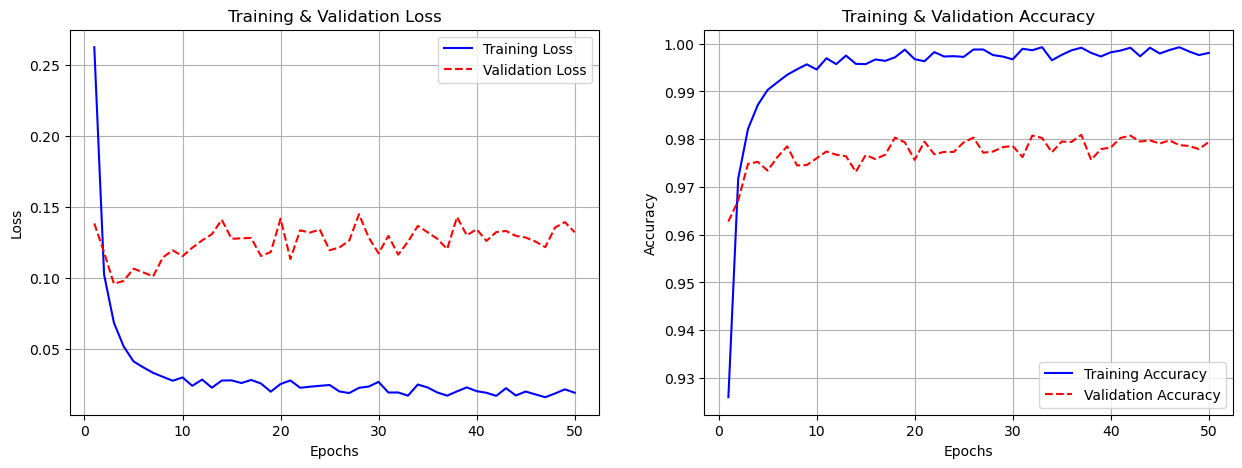

In [77]:
import matplotlib.pyplot as plt
print('==== L2 Regularization ====')

epochs = range(1, len(mnist_L2R_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_L2R_H.history['loss'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_L2R_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Drop out

In [79]:
mnist_D = models.Sequential()
mnist_D.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist_D.add(layers.Dropout(0.4))
mnist_D.add(layers.Dense(256, activation = 'relu'))
mnist_D.add(layers.Dropout(0.2))
mnist_D.add(layers.Dense(10, activation = 'softmax'))

In [80]:
mnist_D.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
mnist_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [82]:
# %%time
mnist_D_H = mnist_D.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8181 - loss: 0.5826 - val_accuracy: 0.9574 - val_loss: 0.1447
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9516 - loss: 0.1545 - val_accuracy: 0.9685 - val_loss: 0.1130
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9659 - loss: 0.1088 - val_accuracy: 0.9707 - val_loss: 0.0996
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9719 - loss: 0.0882 - val_accuracy: 0.9732 - val_loss: 0.0960
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9773 - loss: 0.0722 - val_accuracy: 0.9753 - val_loss: 0.0846
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9803 - loss: 0.0625 - val_accuracy: 0.9763 - val_loss: 0.0874
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9824 - loss: 0.0544 - val_accuracy: 0.9778 - val_loss: 0.0781
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9845 - loss: 0.0477 - val_accu

==== Drop Out ====


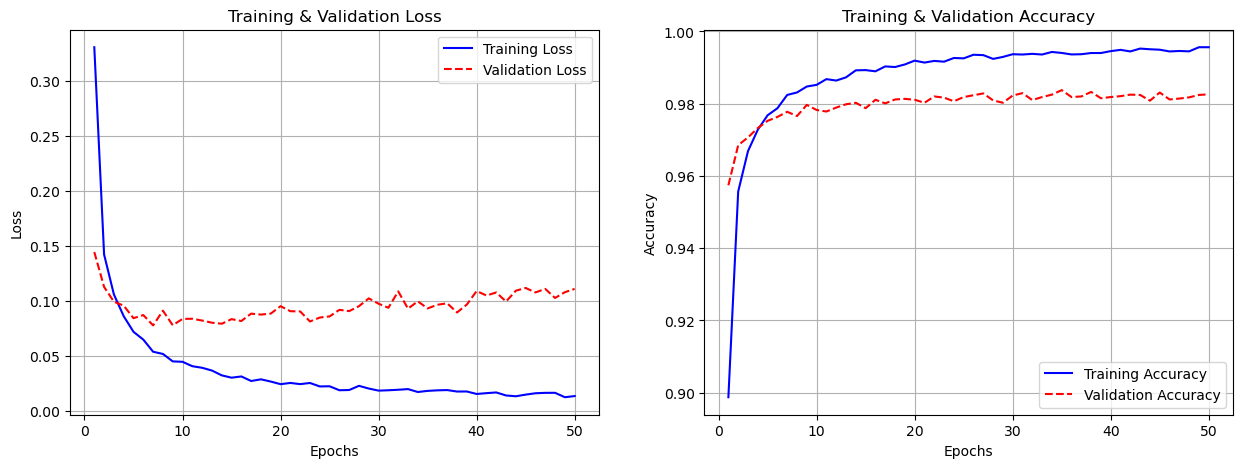

In [83]:
import matplotlib.pyplot as plt
print('==== Drop Out ====')

epochs = range(1, len(mnist_D_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_D_H.history['loss'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_D_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Batch Normalization

In [85]:
mnist_BN = models.Sequential()
mnist_BN.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist_BN.add(layers.BatchNormalization())
mnist_BN.add(layers.Activation('relu'))
mnist_BN.add(layers.Dense(256 ))
mnist_BN.add(layers.BatchNormalization())
mnist_BN.add(layers.Activation('relu'))
mnist_BN.add(layers.Dense(10, activation = 'softmax'))

In [86]:
mnist_BN.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 538,890 (2.06 MB)

 Trainable params: 537,354 (2.05 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [87]:
mnist_BN.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [88]:
# %%time

mnist_BN_H = mnist_BN.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8941 - loss: 0.3495 - val_accuracy: 0.9639 - val_loss: 0.1220
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9799 - loss: 0.0694 - val_accuracy: 0.9693 - val_loss: 0.0992
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9894 - loss: 0.0376 - val_accuracy: 0.9698 - val_loss: 0.1050
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9911 - loss: 0.0295 - val_accuracy: 0.9692 - val_loss: 0.1018
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9938 - loss: 0.0208 - val_accuracy: 0.9736 - val_loss: 0.0993
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9950 - loss: 0.0163 - val_accuracy: 0.9747 - val_loss: 0.0975
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9960 - loss: 0.0137 - val_accuracy: 0.9742 - val_loss: 0.1017
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9967 - loss: 0.0116 - val_accu

==== Batch Normalization ====


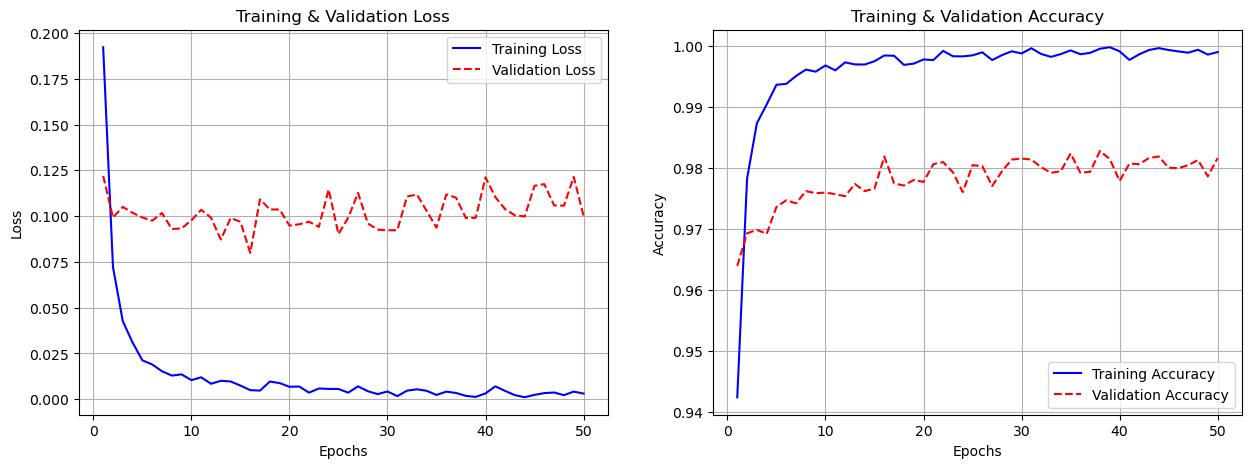

In [89]:
import matplotlib.pyplot as plt
print('==== Batch Normalization ====')

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_BN_H.history['loss'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_BN_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# loss 결과 비교

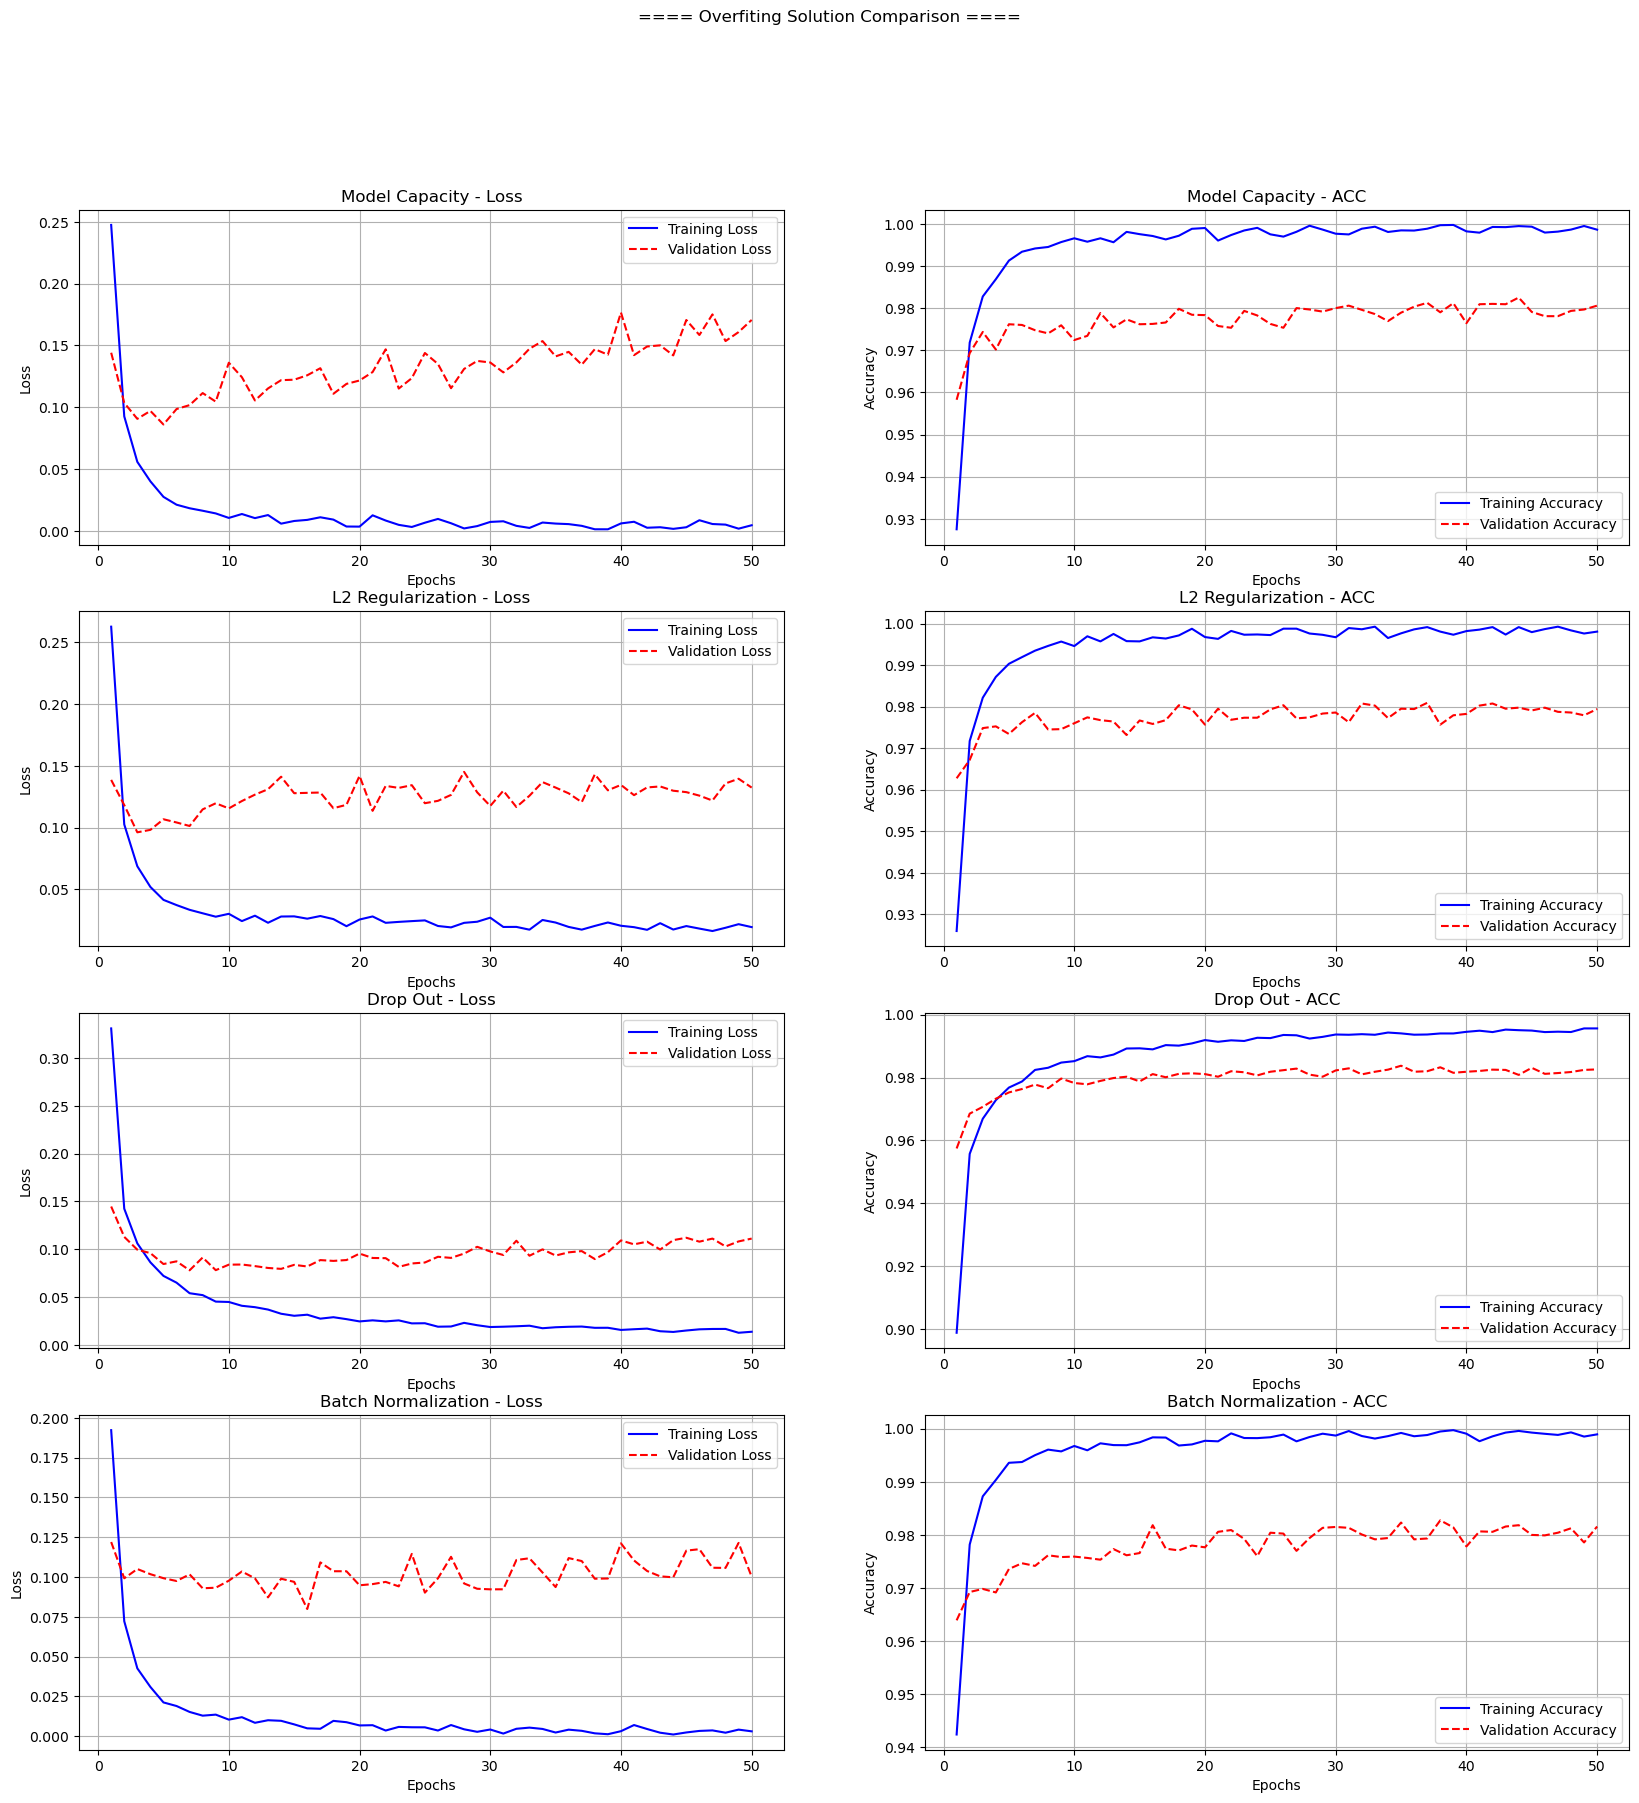

In [91]:
import matplotlib.pyplot as plt

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Overfiting Solution Comparison ====')


plt.subplot(4, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Model Capacity - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Model Capacity - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()


plt.subplot(4, 2, 3)
plt.plot(epochs, mnist_L2R_H.history['loss'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_loss'], 'r--')
plt.title('L2 Regularization - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 4)
plt.plot(epochs, mnist_L2R_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_accuracy'], 'r--')
plt.title('L2 Regularization - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()


plt.subplot(4, 2, 5)
plt.plot(epochs, mnist_D_H.history['loss'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_loss'], 'r--')
plt.title('Drop Out - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 6)
plt.plot(epochs, mnist_D_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_accuracy'], 'r--')
plt.title('Drop Out - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()



plt.subplot(4, 2, 7)
plt.plot(epochs, mnist_BN_H.history['loss'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_loss'], 'r--')
plt.title('Batch Normalization - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 8)
plt.plot(epochs, mnist_BN_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_accuracy'], 'r--')
plt.title('Batch Normalization - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Batch Normalization & Drop out

In [93]:
mnist_BN_D = models.Sequential()

mnist_BN_D.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist_BN_D.add(layers.BatchNormalization())
mnist_BN_D.add(layers.Activation('relu'))
mnist_BN_D.add(layers.Dropout(0.4))

mnist_BN_D.add(layers.Dense(256 ))
mnist_BN_D.add(layers.BatchNormalization())
mnist_BN_D.add(layers.Activation('relu'))
mnist_BN_D.add(layers.Dropout(0.4))
mnist_BN_D.add(layers.Dense(10, activation = 'softmax'))

In [94]:
mnist_BN_D.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 538,890 (2.06 MB)

 Trainable params: 537,354 (2.05 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [95]:
mnist_BN_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [96]:
# %%time

mnist_BN_D_H = mnist_BN_D.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8173 - loss: 0.5785 - val_accuracy: 0.9523 - val_loss: 0.1581
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9463 - loss: 0.1780 - val_accuracy: 0.9666 - val_loss: 0.1139
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9593 - loss: 0.1349 - val_accuracy: 0.9713 - val_loss: 0.0992
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9657 - loss: 0.1065 - val_accuracy: 0.9709 - val_loss: 0.0971
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9714 - loss: 0.0890 - val_accuracy: 0.9747 - val_loss: 0.0887
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9747 - loss: 0.0794 - val_accuracy: 0.9757 - val_loss: 0.0830
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9783 - loss: 0.0670 - val_accuracy: 0.9767 - val_loss: 0.0837
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9790 - loss: 0.0628 - val_accu

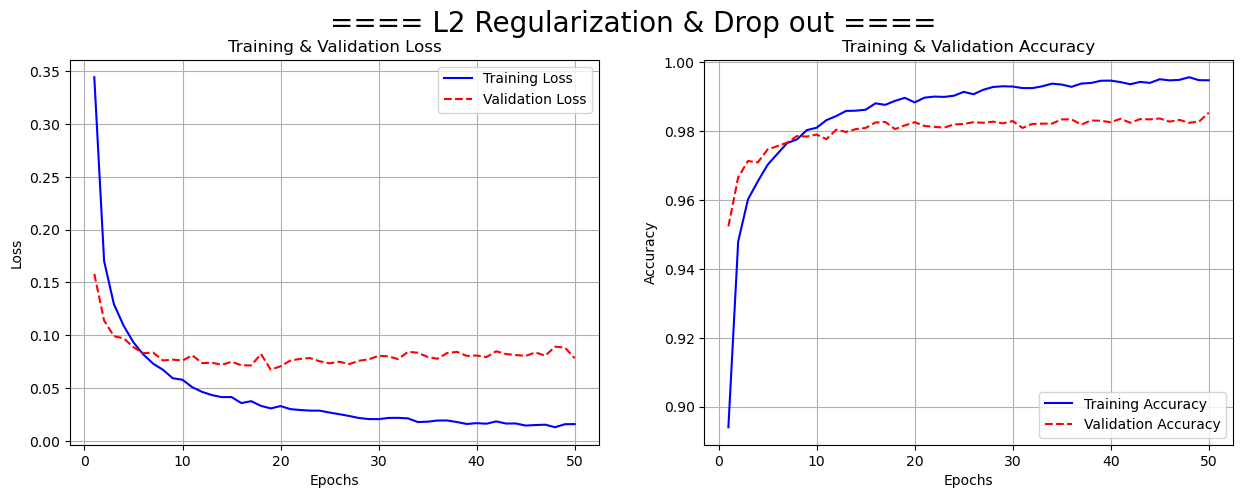

In [97]:
import matplotlib.pyplot as plt

history_model = mnist_BN_D_H

epochs = range(1, len(history_model.history['loss']) + 1)
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization & Drop out

In [99]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_D = models.Sequential()
mnist_L2R_D.add(layers.Dense(512, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_D.add(layers.Dropout(0.4))
mnist_L2R_D.add(layers.Dense(256, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_D.add(layers.Dropout(0.2))
mnist_L2R_D.add(layers.Dense(10, activation = 'softmax'))

In [100]:
mnist_L2R_D.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [101]:
mnist_L2R_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [102]:
# %%time

mnist_L2R_D_H = mnist_L2R_D.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8205 - loss: 0.5882 - val_accuracy: 0.9559 - val_loss: 0.1615
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9513 - loss: 0.1647 - val_accuracy: 0.9675 - val_loss: 0.1209
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9664 - loss: 0.1175 - val_accuracy: 0.9718 - val_loss: 0.1085
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9743 - loss: 0.0945 - val_accuracy: 0.9747 - val_loss: 0.0999
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9761 - loss: 0.0888 - val_accuracy: 0.9744 - val_loss: 0.1022
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9796 - loss: 0.0781 - val_accuracy: 0.9760 - val_loss: 0.1006
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9808 - loss: 0.0724 - val_accuracy: 0.9781 - val_loss: 0.0951
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9847 - loss: 0.0641 - val_accu

In [103]:
import matplotlib.pyplot as plt

history_model = mnist_Bmnist_L2R_D_HN_D_H
epochs = range(1, len(history_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== Batch Normalization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

NameError: name 'mnist_Bmnist_L2R_D_HN_D_H' is not defined

# L2 Regularization & Batch Normalization

In [ ]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_BN = models.Sequential()
mnist_L2R_BN.add(layers.Dense(512,
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_BN.add(layers.BatchNormalization())
mnist_L2R_BN.add(layers.Activation('relu'))


mnist_L2R_BN.add(layers.Dense(256,
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_BN.add(layers.BatchNormalization())
mnist_L2R_BN.add(layers.Activation('relu'))

mnist_L2R_BN.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_L2R_BN.summary()

In [ ]:
mnist_L2R_BN.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
# %%time

mnist_L2R_BN_H = mnist_L2R_BN.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

In [ ]:
import matplotlib.pyplot as plt

history_model = mnist_L2R_BN_H
epochs = range(1, len(history_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Batch Normalization ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization & Batch Normalization & Drop out

In [ ]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_BN_D = models.Sequential()
mnist_L2R_BN_D.add(layers.Dense(512,
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_BN_D.add(layers.BatchNormalization())
mnist_L2R_BN_D.add(layers.Activation('relu'))
mnist_L2R_BN_D.add(layers.Dropout(0.4))

mnist_L2R_BN_D.add(layers.Dense(256,
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_BN_D.add(layers.BatchNormalization())
mnist_L2R_BN_D.add(layers.Activation('relu'))
mnist_L2R_BN_D.add(layers.Dropout(0.2))

mnist_L2R_BN_D.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_L2R_BN_D.summary()

In [ ]:
mnist_L2R_BN_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
# %%time

mnist_L2R_BN_D_H = mnist_L2R_BN_D.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

In [ ]:
import matplotlib.pyplot as plt

history_model = mnist_L2R_BN_D_H
epochs = range(1, len(history_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Batch Normalization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# 조합 loss 결과 비교

In [ ]:
model_h_list = ['mnist_L2R_BN_H', 'mnist_L2R_D_H', 'mnist_BN_D_H', 'mnist_L2R_BN_D_H']
model_h_vlist = [mnist_L2R_BN_H, mnist_L2R_D_H, mnist_BN_D_H, mnist_L2R_BN_D_H]

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Overfiting Solution Comparison ====', fontsize=20)


for i in range(len(model_h_list)):
    plt.subplot(len(model_h_list), int(len(model_h_list)/2), i+1)
    plt.plot(epochs, model_h_vlist[i].history['loss'], 'b-')
    plt.plot(epochs, model_h_vlist[i].history['val_loss'], 'r--')
    plt.title(f'{model_h_list[i]} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.grid()

plt.show()

# The End